# Reduce the sample size.

In this notebook, we reduce the sample size to make the analysis more approachable using average infrastructure.

In [39]:
from __future__ import print_function
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib

import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
sns.set(font_scale=1.5)

sns.set_context('paper')

%matplotlib notebook

import pandas as pd

data_location = "../../data/raw/"

## TSV derived from the VCF dataset

In [2]:
# For a cohort of 2749 samples (TB-portals + HTBC)

# ROWS - inclusion of INDELS lead to 96633 more data points
# cat cohort.bqsr.filter.snps.tsv  | wc -l => 356154
# cat cohort.bqsr.filter.snps.indels.tsv  | wc -l => 452787

# In the reduced dataset 1726 samples
# cat final.cohort.bqsr.filter.snps.tsv | wc -l => 142327

# In the final filtered dataset for 1726 samples
# head -1 final.binarized_final_monolabel_df.tsv | sed 's/[^\t]//g'| wc -c => 52684

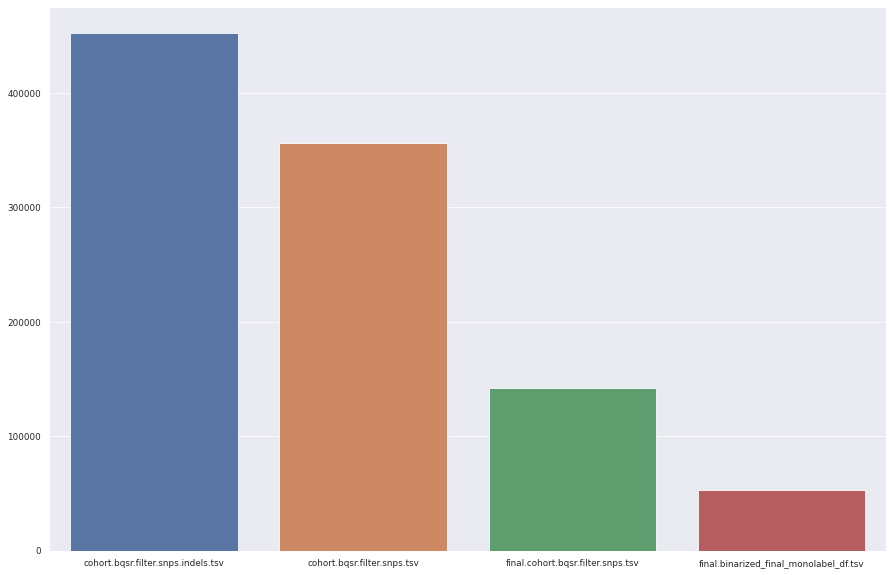

In [8]:


a4_dims = (15, 10)
fig, ax = pyplot.subplots(figsize=a4_dims) 
sns.barplot(ax=ax, x=['cohort.bqsr.filter.snps.indels.tsv', 'cohort.bqsr.filter.snps.tsv', 'final.cohort.bqsr.filter.snps.tsv', 'final.binarized_final_monolabel_df.tsv' ], y=[452787, 356154, 142327, 52684 ]);
 


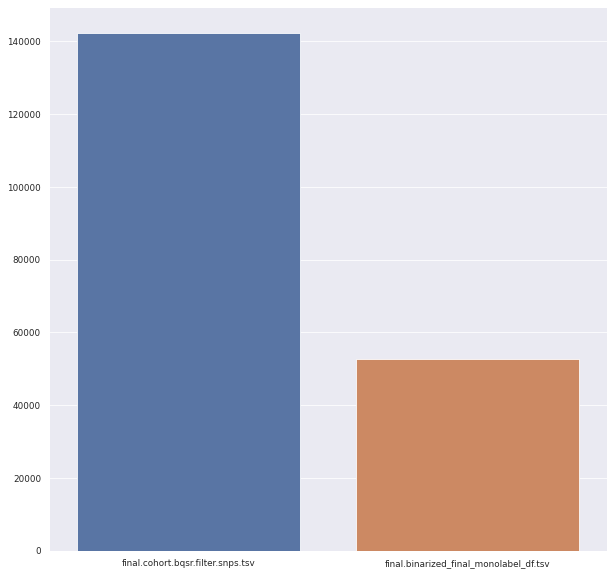

In [7]:


a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims) 
sns.barplot(ax=ax, x=['final.cohort.bqsr.filter.snps.tsv', 'final.binarized_final_monolabel_df.tsv' ], y=[ 142327, 52684 ]);
 


### Tb-profiler dataset

In [10]:
# Read and transpose the cohort tbprofile file for ALL TB-portals + HTBC Genomes with SampleID as index


tbprofiler_df = pd.read_json(data_location + "cohort.tbprofiler.json", encoding="UTF-8")
tbprofiler_df = tbprofiler_df.transpose()
tbprofiler_df.head()


,MDR,XDR,amikacin,aminoglycosides,bedaquiline,capreomycin,ciprofloxacin,clofazimine,cycloserine,delamanid,...,levofloxacin,linezolid,main_lin,moxifloxacin,ofloxacin,para-aminosalicylic_acid,pyrazinamide,rifampicin,streptomycin,sublin
ERR027458,R,,-,-,-,-,-,-,-,-,...,-,-,lineage2,-,-,-,-,"rpoB_p.Ser450Leu, rpoB_p.Glu761Asp",rrs_r.517c>t,lineage2.2.1
ERR027459,,,-,-,-,-,-,-,-,-,...,-,-,lineage2,-,-,-,-,rpoB_p.Leu430Pro,-,lineage2.2.1
ERR027460,,,-,-,-,-,-,-,-,-,...,-,-,,-,-,-,-,-,-,
ERR027461,,,-,-,-,-,-,-,-,-,...,-,-,lineage2,-,-,-,-,-,-,lineage2.2.1
ERR027462,,,-,-,-,-,-,-,-,-,...,-,-,lineage2,-,-,-,-,-,-,lineage2.2.1


In [11]:
tbprofiler_df.shape


(2654, 26)

In [12]:
tbprofiler_df.columns.tolist()

['MDR',
 'XDR',
 'amikacin',
 'aminoglycosides',
 'bedaquiline',
 'capreomycin',
 'ciprofloxacin',
 'clofazimine',
 'cycloserine',
 'delamanid',
 'drtype',
 'ethambutol',
 'ethionamide',
 'fluoroquinolones',
 'isoniazid',
 'kanamycin',
 'levofloxacin',
 'linezolid',
 'main_lin',
 'moxifloxacin',
 'ofloxacin',
 'para-aminosalicylic_acid',
 'pyrazinamide',
 'rifampicin',
 'streptomycin',
 'sublin']

In [13]:
# Derive a new column `Resistance_Status` by treating MDR/XDR/TDR as the same and preparing Tb-profiler output for Binary Classification

resistance_status_df = tbprofiler_df
resistance_status_df['Resistance_Status'] = resistance_status_df.apply(
    lambda row: 'Sensitive' if (row.drtype == 'Sensitive') else 'Resistant', axis=1)
# resistance_status_df.head()



In [14]:
drugs_column_names = ['rifampicin',
                      'isoniazid',
                      'pyrazinamide',
                      'ethambutol',
                      'streptomycin',
                      'fluoroquinolones',
                      'moxifloxacin',
                      'ofloxacin',
                      'levofloxacin',
                      'ciprofloxacin',
                      'aminoglycosides',
                      'amikacin',
                      'kanamycin',
                      'capreomycin',
                      'ethionamide',
                      'para-aminosalicylic_acid',
                      'cycloserine',
                      'linezolid',
                      'bedaquiline',
                      'clofazimine',
                      'delamanid']

lineage_column_names = ['main_lin', 'sublin']

resistance_status_column_names = ['drtype', 'MDR', 'XDR', 'Resistance_Status']

renamed_drug_columns_names = ['rifampicin_resistance',
                              'isoniazid_resistance',
                              'pyrazinamide_resistance',
                              'ethambutol_resistance',
                              'streptomycin_resistance',
                              'fluoroquinolones_resistance',
                              'moxifloxacin_resistance',
                              'ofloxacin_resistance',
                              'levofloxacin_resistance',
                              'ciprofloxacin_resistance',
                              'aminoglycosides_resistance',
                              'amikacin_resistance',
                              'kanamycin_resistance',
                              'capreomycin_resistance',
                              'ethionamide_resistance',
                              'para-aminosalicylic_acid_resistance',
                              'cycloserine_resistance',
                              'linezolid_resistance',
                              'bedaquiline_resistance',
                              'clofazimine_resistance',
                              'delamanid_resistance']

renamed_drug_columns_names_dict = {
    'rifampicin': 'rifampicin_resistance',
    'isoniazid': 'isoniazid_resistance',
    'pyrazinamide': 'pyrazinamide_resistance',
    'ethambutol': 'ethambutol_resistance',
    'streptomycin': 'streptomycin_resistance',
    'fluoroquinolones': 'fluoroquinolones_resistance',
    'moxifloxacin': 'moxifloxacin_resistance',
    'ofloxacin': 'ofloxacin_resistance',
    'levofloxacin': 'levofloxacin_resistance',
    'ciprofloxacin': 'ciprofloxacin_resistance',
    'aminoglycosides': 'aminoglycosides_resistance',
    'amikacin': 'amikacin_resistance',
    'kanamycin': 'kanamycin_resistance',
    'capreomycin': 'capreomycin_resistance',
    'ethionamide': 'ethionamide_resistance',
    'para-aminosalicylic_acid': 'para-aminosalicylic_acid_resistance',
    'cycloserine': 'cycloserine_resistance',
    'linezolid': 'linezolid_resistance',
    'bedaquiline': 'bedaquiline_resistance',
    'clofazimine': 'clofazimine_resistance',
    'delamanid': 'delamanid_resistance'
}


In [15]:
# Rename the columns for being explicit once the overall dataframe is created.

resistance_status_df.rename(columns=renamed_drug_columns_names_dict,
                            inplace=True)

resistance_status_df.head()

,MDR,XDR,amikacin_resistance,aminoglycosides_resistance,bedaquiline_resistance,capreomycin_resistance,ciprofloxacin_resistance,clofazimine_resistance,cycloserine_resistance,delamanid_resistance,...,linezolid_resistance,main_lin,moxifloxacin_resistance,ofloxacin_resistance,para-aminosalicylic_acid_resistance,pyrazinamide_resistance,rifampicin_resistance,streptomycin_resistance,sublin,Resistance_Status
ERR027458,R,,-,-,-,-,-,-,-,-,...,-,lineage2,-,-,-,-,"rpoB_p.Ser450Leu, rpoB_p.Glu761Asp",rrs_r.517c>t,lineage2.2.1,Resistant
ERR027459,,,-,-,-,-,-,-,-,-,...,-,lineage2,-,-,-,-,rpoB_p.Leu430Pro,-,lineage2.2.1,Resistant
ERR027460,,,-,-,-,-,-,-,-,-,...,-,,-,-,-,-,-,-,,Sensitive
ERR027461,,,-,-,-,-,-,-,-,-,...,-,lineage2,-,-,-,-,-,-,lineage2.2.1,Sensitive
ERR027462,,,-,-,-,-,-,-,-,-,...,-,lineage2,-,-,-,-,-,-,lineage2.2.1,Sensitive


In [16]:
# Binarize the dataframe, for drug columns, to focus only on the presence/absence of mutation.
# We treat all "-" as absence of mutation and assign it as 0

binarized_resistance_status_df = resistance_status_df

for col_name in renamed_drug_columns_names:
    binarized_resistance_status_df[col_name] = resistance_status_df[col_name].apply(
        lambda resistance: 0 if resistance is '-' else 1)


In [51]:
binarized_resistance_status_df.head()

,MDR,XDR,amikacin_resistance,aminoglycosides_resistance,bedaquiline_resistance,capreomycin_resistance,ciprofloxacin_resistance,clofazimine_resistance,cycloserine_resistance,delamanid_resistance,...,linezolid_resistance,main_lin,moxifloxacin_resistance,ofloxacin_resistance,para-aminosalicylic_acid_resistance,pyrazinamide_resistance,rifampicin_resistance,streptomycin_resistance,sublin,Resistance_Status
ERR027458,R,,0,0,0,0,0,0,0,0,...,0,lineage2,0,0,0,0,1,1,lineage2.2.1,Resistant
ERR027459,,,0,0,0,0,0,0,0,0,...,0,lineage2,0,0,0,0,1,0,lineage2.2.1,Resistant
ERR027460,,,0,0,0,0,0,0,0,0,...,0,,0,0,0,0,0,0,,Sensitive
ERR027461,,,0,0,0,0,0,0,0,0,...,0,lineage2,0,0,0,0,0,0,lineage2.2.1,Sensitive
ERR027462,,,0,0,0,0,0,0,0,0,...,0,lineage2,0,0,0,0,0,0,lineage2.2.1,Sensitive


In [52]:
binarized_resistance_status_df.shape


(2654, 27)

In [53]:
binarized_resistance_status_df[['Resistance_Status']].head()

,Resistance_Status
ERR027458,Resistant
ERR027459,Resistant
ERR027460,Sensitive
ERR027461,Sensitive
ERR027462,Sensitive


In [54]:
binarized_resistance_status_df[['Resistance_Status']]

,Resistance_Status
ERR027458,Resistant
ERR027459,Resistant
ERR027460,Sensitive
ERR027461,Sensitive
ERR027462,Sensitive
ERR027463,Resistant
ERR027464,Sensitive
ERR027465,Resistant
ERR027466,Sensitive
ERR027467,Resistant


In [41]:
binarized_resistance_status_df[renamed_drug_columns_names].sum().to_dict()

{'rifampicin_resistance': 1727,
 'isoniazid_resistance': 1813,
 'pyrazinamide_resistance': 1110,
 'ethambutol_resistance': 1549,
 'streptomycin_resistance': 1642,
 'fluoroquinolones_resistance': 883,
 'moxifloxacin_resistance': 883,
 'ofloxacin_resistance': 883,
 'levofloxacin_resistance': 883,
 'ciprofloxacin_resistance': 883,
 'aminoglycosides_resistance': 401,
 'amikacin_resistance': 401,
 'kanamycin_resistance': 1049,
 'capreomycin_resistance': 460,
 'ethionamide_resistance': 1016,
 'para-aminosalicylic_acid_resistance': 163,
 'cycloserine_resistance': 94,
 'linezolid_resistance': 5,
 'bedaquiline_resistance': 1,
 'clofazimine_resistance': 1,
 'delamanid_resistance': 14}

In [37]:
a_dict = binarized_resistance_status_df[renamed_drug_columns_names].sum().to_dict()

# sns.barplot(data=a_dict, y=a_dict.values())
a_dict

{'rifampicin_resistance': 1727,
 'isoniazid_resistance': 1813,
 'pyrazinamide_resistance': 1110,
 'ethambutol_resistance': 1549,
 'streptomycin_resistance': 1642,
 'fluoroquinolones_resistance': 883,
 'moxifloxacin_resistance': 883,
 'ofloxacin_resistance': 883,
 'levofloxacin_resistance': 883,
 'ciprofloxacin_resistance': 883,
 'aminoglycosides_resistance': 401,
 'amikacin_resistance': 401,
 'kanamycin_resistance': 1049,
 'capreomycin_resistance': 460,
 'ethionamide_resistance': 1016,
 'para-aminosalicylic_acid_resistance': 163,
 'cycloserine_resistance': 94,
 'linezolid_resistance': 5,
 'bedaquiline_resistance': 1,
 'clofazimine_resistance': 1,
 'delamanid_resistance': 14}

<AxesSubplot:>

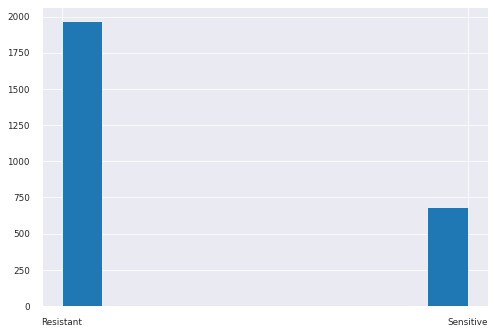

In [55]:
# Distribution of Resistant/Sensitive genomes

binarized_resistance_status_df['Resistance_Status'].hist()


In [58]:
# Isolate a list of resistant genomes

resistant_genomes = binarized_resistance_status_df[binarized_resistance_status_df['Resistance_Status'] == "Resistant"].index.tolist()
resistant_genomes

['ERR027458',
 'ERR027459',
 'ERR027463',
 'ERR027465',
 'ERR027467',
 'ERR027468',
 'ERR047880',
 'ERR047881',
 'ERR047882',
 'ERR047883',
 'ERR047884',
 'ERR047885',
 'ERR047886',
 'ERR047887',
 'ERR047888',
 'ERR047889',
 'ERR047890',
 'ERR047891',
 'ERR067576',
 'ERR067577',
 'ERR067578',
 'ERR067581',
 'ERR067582',
 'ERR067583',
 'ERR067584',
 'ERR067586',
 'ERR067587',
 'ERR067588',
 'ERR067589',
 'ERR067590',
 'ERR067592',
 'ERR067593',
 'ERR067596',
 'ERR067598',
 'ERR067599',
 'ERR067600',
 'ERR067602',
 'ERR067603',
 'ERR067605',
 'ERR067608',
 'ERR067609',
 'ERR067610',
 'ERR067611',
 'ERR067612',
 'ERR067613',
 'ERR067615',
 'ERR067618',
 'ERR067619',
 'ERR067620',
 'ERR067621',
 'ERR067622',
 'ERR067623',
 'ERR067625',
 'ERR067626',
 'ERR067627',
 'ERR067628',
 'ERR067629',
 'ERR067630',
 'ERR067631',
 'ERR067635',
 'ERR067638',
 'ERR067639',
 'ERR067641',
 'ERR067642',
 'ERR067643',
 'ERR067644',
 'ERR067645',
 'ERR067647',
 'ERR067649',
 'ERR067650',
 'ERR067651',
 'ERR0

In [59]:
# Isolate a list of sensitive genomes

sensitive_genomes = binarized_resistance_status_df[binarized_resistance_status_df['Resistance_Status'] == "Sensitive"].index.tolist()
sensitive_genomes

['ERR027460',
 'ERR027461',
 'ERR027462',
 'ERR027464',
 'ERR027466',
 'ERR027469',
 'ERR067579',
 'ERR067580',
 'ERR067585',
 'ERR067591',
 'ERR067594',
 'ERR067595',
 'ERR067597',
 'ERR067601',
 'ERR067604',
 'ERR067606',
 'ERR067607',
 'ERR067614',
 'ERR067616',
 'ERR067617',
 'ERR067624',
 'ERR067632',
 'ERR067633',
 'ERR067634',
 'ERR067636',
 'ERR067637',
 'ERR067640',
 'ERR067646',
 'ERR067648',
 'ERR067655',
 'ERR067664',
 'ERR067676',
 'ERR067680',
 'ERR067682',
 'ERR067684',
 'ERR067686',
 'ERR067688',
 'ERR067689',
 'ERR067690',
 'ERR067693',
 'ERR067699',
 'ERR067700',
 'ERR067702',
 'ERR067706',
 'ERR067708',
 'ERR067713',
 'ERR067716',
 'ERR067719',
 'ERR067726',
 'ERR067730',
 'ERR067737',
 'ERR067743',
 'ERR067753',
 'ERR067757',
 'ERR3335783',
 'ERR688008',
 'ERR688009',
 'ERR688010',
 'ERR688011',
 'ERR688012',
 'SRR10379878',
 'SRR10379880',
 'SRR10379881',
 'SRR10379884',
 'SRR10379885',
 'SRR10379888',
 'SRR10379891',
 'SRR10379892',
 'SRR10379893',
 'SRR10379897',

In [82]:
# Read the genomes IDs of genomes
# - Tb-portals
# - HTBC

import json

with open(data_location + "test_train_genome_ids.json") as f:
    all_genomes_ids_dict = json.load(f)

all_genomes_ids_dict


{'tb_portals': ['SRR10379876',
  'SRR10379877',
  'SRR10379878',
  'SRR10379879',
  'SRR10379880',
  'SRR10379881',
  'SRR10379882',
  'SRR10379883',
  'SRR10379884',
  'SRR10379885',
  'SRR10379886',
  'SRR10379887',
  'SRR10379888',
  'SRR10379889',
  'SRR10379890',
  'SRR10379891',
  'SRR10379892',
  'SRR10379893',
  'SRR10379894',
  'SRR10379895',
  'SRR10379896',
  'SRR10379897',
  'SRR10379898',
  'SRR10379899',
  'SRR10379900',
  'SRR10379901',
  'SRR10379902',
  'SRR10379903',
  'SRR10379904',
  'SRR10379905',
  'SRR10379906',
  'SRR10379907',
  'SRR10379908',
  'SRR10379909',
  'SRR10379910',
  'SRR10379911',
  'SRR10379912',
  'SRR10379913',
  'SRR10379914',
  'SRR10379915',
  'SRR10379916',
  'SRR10379917',
  'SRR10379918',
  'SRR10379919',
  'SRR10379920',
  'SRR10379921',
  'SRR10379922',
  'SRR10379923',
  'SRR10379924',
  'SRR10379925',
  'SRR10379926',
  'SRR10379927',
  'SRR10379928',
  'SRR10379929',
  'SRR10379930',
  'SRR10379931',
  'SRR10379932',
  'SRR10379933',


In [48]:
# Genome IDs from the tb-portals dataset
tbportals_genomes = all_genomes_ids_dict['tb_portals']

len(tbportals_genomes)

2153

In [41]:
tbportals_genomes_set = set(tbportals_genomes)

tbportals_genomes_set

{'SRR11033621',
 'SRR5153826',
 'SRR5153609',
 'SRR10397123',
 'SRR10397226',
 'SRR11033694',
 'SRR6807744',
 'SRR5153929',
 'SRR7592352',
 'SRR1159986',
 'SRR11033741',
 'SRR10380225',
 'SRR6384962',
 'SRR7592389',
 'SRR10379973',
 'SRR10397114',
 'SRR5153321',
 'SRR7657753',
 'SRR1163173',
 'SRR5153842',
 'SRR10380168',
 'SRR7592382',
 'SRR5153074',
 'SRR3743386',
 'SRR7516288',
 'SRR7592373',
 'SRR9738541',
 'SRR6807739',
 'SRR11033729',
 'SRR10380203',
 'SRR11033665',
 'SRR1163365',
 'SRR6458443',
 'SRR6807705',
 'SRR6356994',
 'SRR10379986',
 'SRR5153614',
 'SRR10525332',
 'SRR10379932',
 'SRR5486889',
 'SRR10397105',
 'SRR1159310',
 'SRR6356975',
 'SRR3544741',
 'SRR7592348',
 'SRR7516377',
 'SRR10380082',
 'SRR6458449',
 'SRR11033779',
 'SRR1163392',
 'SRR10379880',
 'SRR11033762',
 'SRR10380061',
 'SRR5153076',
 'SRR7516430',
 'SRR6807715',
 'SRR10380019',
 'SRR5153253',
 'SRR3743483',
 'SRR10379897',
 'SRR10397270',
 'SRR1159283',
 'SRR11033689',
 'SRR10379957',
 'SRR5153918',

In [49]:
# Genome IDs from the htbc dataset
htbc_genomes = set(all_genomes_ids_dict['htbc'])

len(htbc_genomes)


501

In [44]:
htbc_genomes_set = set(htbc_genomes)

In [68]:
# Find HTBC genomes, which are resistant

htbc_resistant_genomes = list(htbc_genomes_set.intersection(resistant_genomes))
len(htbc_resistant_genomes)


338

In [69]:
# Find HTBC genomes, which are sensitive

htbc_sensitive_genomes = list(htbc_genomes_set.intersection(sensitive_genomes))
len(htbc_sensitive_genomes)

163

In [70]:
# Find Tb-portals genomes, which are resistant
tbportals_resistant_genomes  = list(tbportals_genomes_set.intersection(resistant_genomes))
len(tbportals_resistant_genomes[830:])

800

In [71]:
# Find Tb-portals genomes, which are sensitive
tbportals_sensitive_genomes = list(tbportals_genomes_set.intersection(sensitive_genomes))
len(tbportals_sensitive_genomes)

523

In [73]:
# Create a list of HTBC genomes to be used for the final analysis.

final_htbc_test_genome_ids = htbc_resistant_genomes + htbc_sensitive_genomes
len(final_htbc_test_genome_ids)

501

In [80]:
# Create a list of Tb-portals genomes to be used for the final analysis.

final_tbportals_train_genome_ids = tbportals_resistant_genomes[830:] + tbportals_sensitive_genomes[100:]
len(final_tbportals_train_genome_ids)


1223

In [83]:
# Append the list of final Tb-portals genomes to the JSON file.

all_genomes_ids_dict['final_tbportals_train_genomes'] = final_tbportals_train_genome_ids
all_genomes_ids_dict.keys()



dict_keys(['tb_portals', 'htbc', 'final_tbportals_train_genomes'])

In [84]:
# Append the list of final HTBC genomes to the JSON file.

all_genomes_ids_dict['final_htbc_test_genomes'] = final_htbc_test_genome_ids
all_genomes_ids_dict.keys()

dict_keys(['tb_portals', 'htbc', 'final_tbportals_train_genomes', 'final_htbc_test_genomes'])

In [86]:

# Write the final JSON file.
import json

with open(data_location + "test_train_genome_ids.json", "w") as f:
    json.dump(all_genomes_ids_dict, f, indent= 4)


## Create main monolabel dataset and segregate it into
- train dataset
- test dataset

### Read the output of step-001 and derive the monolabel dataset

In [ ]:
binarized_final_df = pd.read_csv("../data/processed/final.binarized_final_multilabel_df.csv").set_index('SampleID')


binarized_final_df.head()

In [ ]:
binarized_final_df.columns

In [ ]:
binarized_final_df.index

In [ ]:
binarized_final_df= binarized_final_df.drop(columns=[*renamed_drug_columns_names, *lineage_column_names, 'drtype', 'MDR', 'XDR'], axis= 1)

binarized_final_df.head()

In [ ]:
binarized_final_df.shape

In [ ]:
binarized_final_df['Resistance_Status']= binarized_final_df['Resistance_Status'].apply(lambda resistance: 0.0 if resistance == 'Sensitive' else 1.0)
binarized_final_df.head()

In [ ]:
binarized_final_df.to_csv("../data/processed/final.binarized_final_monolabel_df.tsv", "\t")
binarized_final_df.head()

In [ ]:


train = binarized_final_df.loc[final_tbportals_train_genome_ids]
train.shape


In [ ]:
train.to_csv("../data/processed/final.train.tsv", "\t")
train.head()

In [ ]:


test = binarized_final_df.loc[final_htbc_test_genome_ids]
test.shape


In [ ]:
test.to_csv("../data/processed/final.test.tsv", "\t")
test.shape